In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv('./hospital_readmissions.csv')

In [78]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [79]:
df.shape

(25000, 17)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [81]:
from sklearn.model_selection import train_test_split

x = df.drop(['readmitted'], axis=1)
y = df['readmitted']


In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [83]:
train_data = x_train.join(y_train)

In [84]:
train_data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
9961,[60-70),3,28,1,21,0,0,0,Other,Musculoskeletal,Respiratory,Other,no,no,yes,yes,no
910,[60-70),3,45,0,17,0,0,0,Missing,Circulatory,Respiratory,Circulatory,no,no,yes,yes,yes
23146,[70-80),3,61,0,17,1,4,1,Emergency/Trauma,Respiratory,Other,Diabetes,no,no,yes,yes,yes
4156,[60-70),2,57,0,18,0,0,0,Missing,Respiratory,Diabetes,Respiratory,no,no,no,yes,yes
5406,[80-90),3,48,0,2,0,0,0,InternalMedicine,Circulatory,Circulatory,Diabetes,no,no,no,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,[60-70),12,28,6,10,0,0,0,Emergency/Trauma,Other,Other,Circulatory,no,no,yes,yes,no
20575,[70-80),3,1,0,8,0,0,0,Emergency/Trauma,Circulatory,Other,Other,no,no,yes,yes,yes
20537,[60-70),3,19,6,20,0,0,0,Surgery,Circulatory,Diabetes,Other,no,no,no,yes,yes
24785,[60-70),6,55,0,12,0,0,0,Emergency/Trauma,Other,Respiratory,Other,no,no,no,no,no


array([[<AxesSubplot:title={'center':'time_in_hospital'}>,
        <AxesSubplot:title={'center':'n_lab_procedures'}>,
        <AxesSubplot:title={'center':'n_procedures'}>],
       [<AxesSubplot:title={'center':'n_medications'}>,
        <AxesSubplot:title={'center':'n_outpatient'}>,
        <AxesSubplot:title={'center':'n_inpatient'}>],
       [<AxesSubplot:title={'center':'n_emergency'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

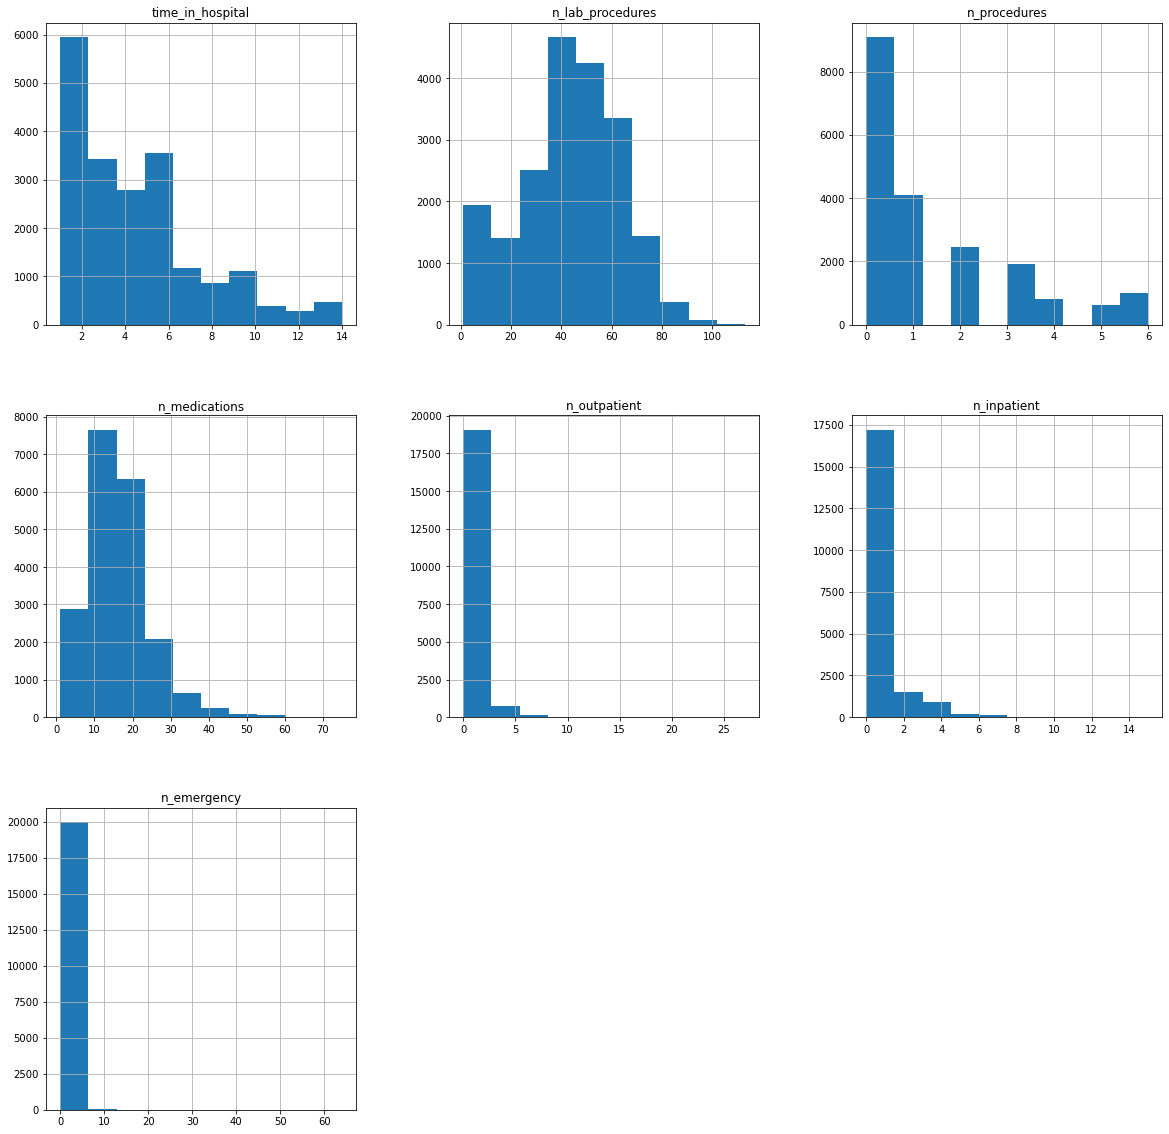

In [85]:
train_data.hist(figsize=(20,20))

In [86]:
train_data['readmitted'] = train_data['readmitted'] == 'yes'
train_data['diabetes_med'] = train_data['diabetes_med'] == 'yes'
train_data['change'] = train_data['change'] == 'yes'

In [87]:
value_mapping = {
    'no': 0,
    'normal': 1,
    'high': 2
}

train_data['A1Ctest'] = train_data['A1Ctest'].map(value_mapping)
train_data['glucose_test'] = train_data['glucose_test'].map(value_mapping)


In [88]:
train_data['diag_1'].unique()

array(['Musculoskeletal', 'Circulatory', 'Respiratory', 'Other',
       'Diabetes', 'Injury', 'Digestive', 'Missing'], dtype=object)

In [89]:
diag_mapping = {
    'Circulatory': 0,
    'Respiratory': 1,
    'Other': 2,
    'Digestive': 3,
    'Injury': 4,
    'Musculoskeletal': 5,
    'Diabetes': 6,
    'Missing': 7
}

train_data['diag_1'] = train_data['diag_1'].map(diag_mapping)
train_data['diag_2'] = train_data['diag_2'].map(diag_mapping)
train_data['diag_3'] = train_data['diag_3'].map(diag_mapping)


In [90]:
train_data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
9961,[60-70),3,28,1,21,0,0,0,Other,5,1,2,0,0,True,True,False
910,[60-70),3,45,0,17,0,0,0,Missing,0,1,0,0,0,True,True,True
23146,[70-80),3,61,0,17,1,4,1,Emergency/Trauma,1,2,6,0,0,True,True,True
4156,[60-70),2,57,0,18,0,0,0,Missing,1,6,1,0,0,False,True,True
5406,[80-90),3,48,0,2,0,0,0,InternalMedicine,0,0,6,0,0,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,[60-70),12,28,6,10,0,0,0,Emergency/Trauma,2,2,0,0,0,True,True,False
20575,[70-80),3,1,0,8,0,0,0,Emergency/Trauma,0,2,2,0,0,True,True,True
20537,[60-70),3,19,6,20,0,0,0,Surgery,0,6,2,0,0,False,True,True
24785,[60-70),6,55,0,12,0,0,0,Emergency/Trauma,2,1,2,0,0,False,False,False


In [91]:
train_data['age'].unique()

array(['[60-70)', '[70-80)', '[80-90)', '[50-60)', '[40-50)', '[90-100)'],
      dtype=object)

In [92]:
age_mapping = {
    '[70-80)': 80,
    '[50-60)': 60,
    '[60-70)': 70,
    '[40-50)': 50,
    '[80-90)': 90,
    '[90-100)': 100
}

train_data['age'] = train_data['age'].map(age_mapping)

In [96]:
train_data = train_data.drop(['medical_specialty'], axis=1)
train_data

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
9961,70,3,28,1,21,0,0,0,5,1,2,0,0,True,True,False
910,70,3,45,0,17,0,0,0,0,1,0,0,0,True,True,True
23146,80,3,61,0,17,1,4,1,1,2,6,0,0,True,True,True
4156,70,2,57,0,18,0,0,0,1,6,1,0,0,False,True,True
5406,90,3,48,0,2,0,0,0,0,0,6,0,0,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,70,12,28,6,10,0,0,0,2,2,0,0,0,True,True,False
20575,80,3,1,0,8,0,0,0,0,2,2,0,0,True,True,True
20537,70,3,19,6,20,0,0,0,0,6,2,0,0,False,True,True
24785,70,6,55,0,12,0,0,0,2,1,2,0,0,False,False,False


<AxesSubplot:>

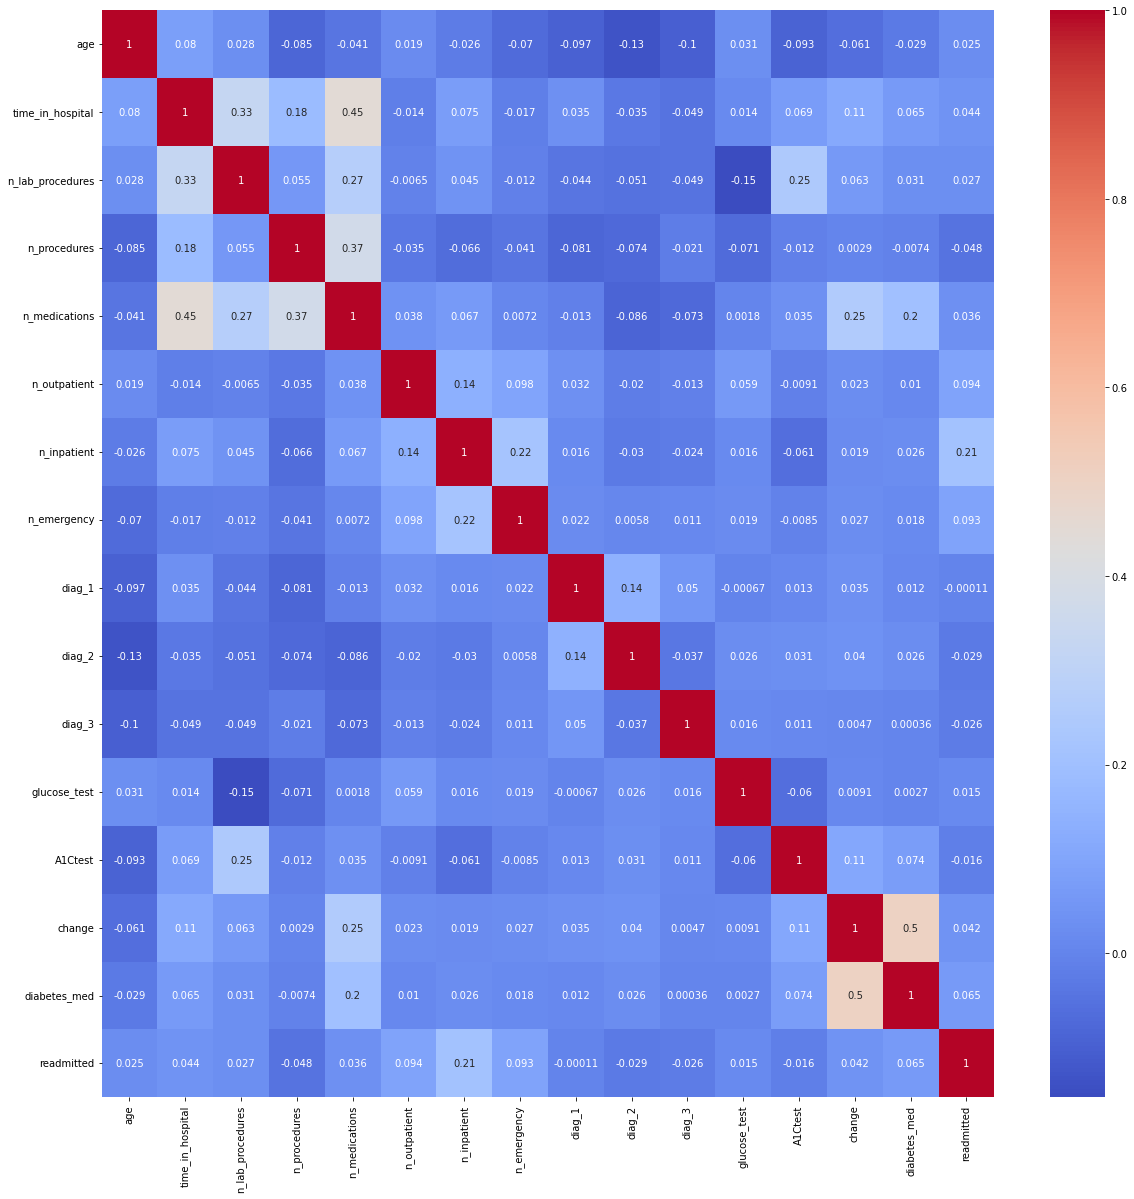

In [97]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')